In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import files
uploaded = files.upload()


Saving Copy of Salary.csv to Copy of Salary (1).csv


In [81]:
#Task1

In [24]:
df = pd.read_csv("Copy of Salary.csv")

In [25]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [36]:
df.duplicated().sum()

0

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
x=df.drop(["Salary"],axis=1)
y=df["Salary"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(x_test)

In [30]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [31]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

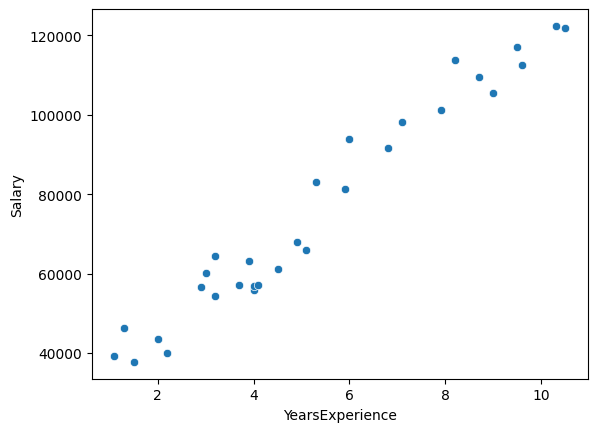

In [32]:
sns.scatterplot(x=df["YearsExperience"],y=df["Salary"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

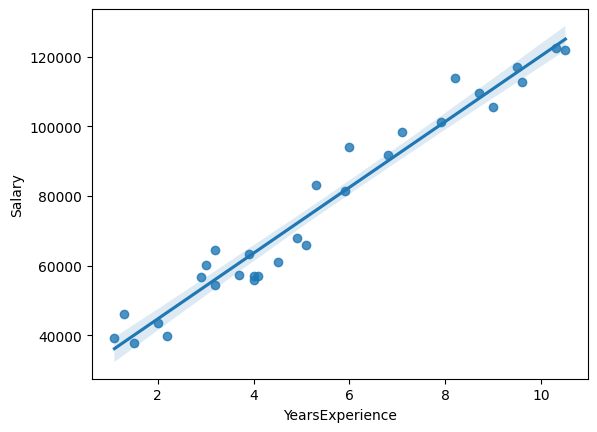

In [33]:
sns.regplot(x=df["YearsExperience"],y=df["Salary"])

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
print("Absloute error",mean_absolute_error(y_test,y_pred))
print("Squared error",mean_squared_error(y_test,y_pred))
print("root mean Squared error",np.sqrt(mean_squared_error(y_test,y_pred)))

Absloute error 3737.417861878896
Squared error 23370078.800832972
root mean Squared error 4834.260936361728


In [40]:
#-----------------------------------------------------------------------------------------------------Task2

In [42]:
from google.colab import files
uploaded = files.upload()

Saving Copy of insurance.csv to Copy of insurance.csv


In [43]:
data = pd.read_csv("Copy of insurance.csv")

In [44]:
#1- read dataset
#2- explore data
#3- visualization
#4- data preprocessing
#5- split data (y = charges)
#6- linear regression model
#7- evaluate model

In [45]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [49]:
data.duplicated().sum()

1

In [53]:
duplicates = data[data.duplicated()]
print("Duplicate row(s):")
print(duplicates)

data = data.drop_duplicates()

Duplicate row(s):
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [54]:
data.duplicated().sum()

0

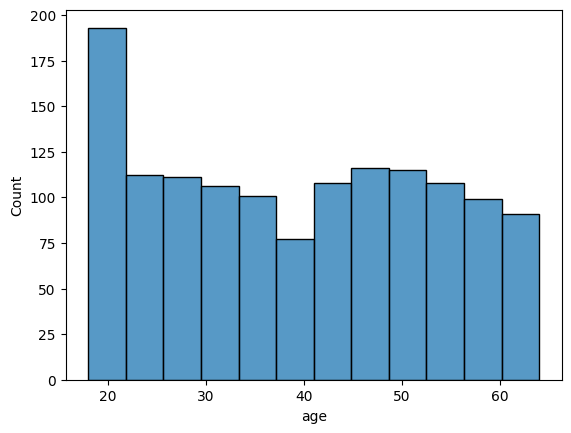

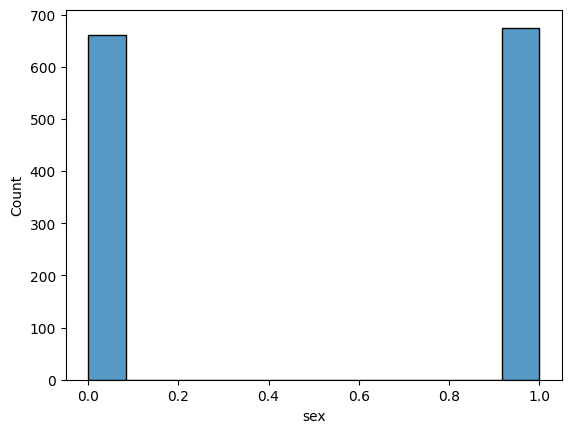

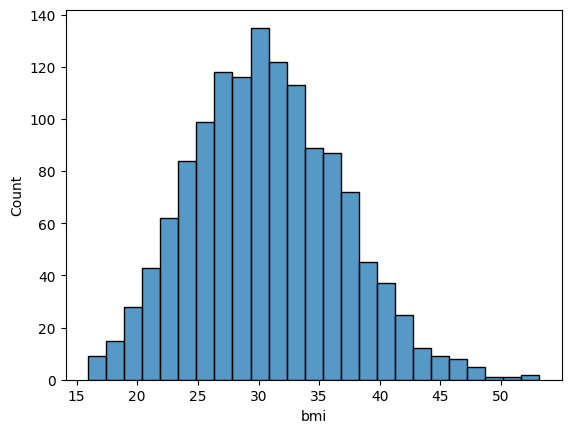

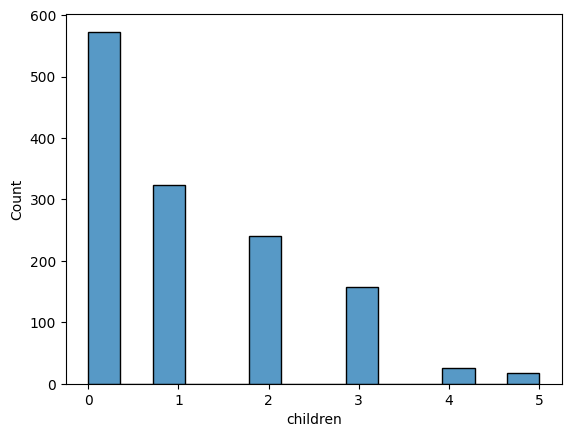

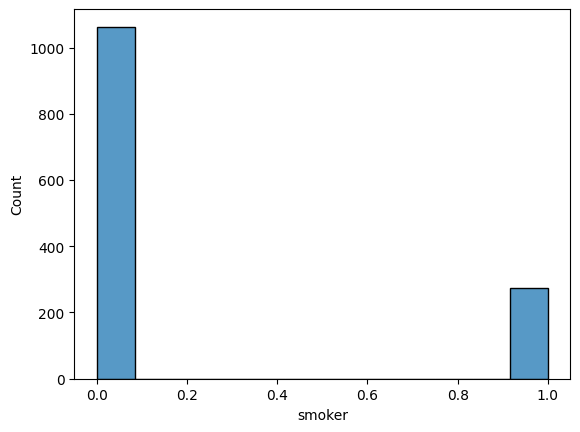

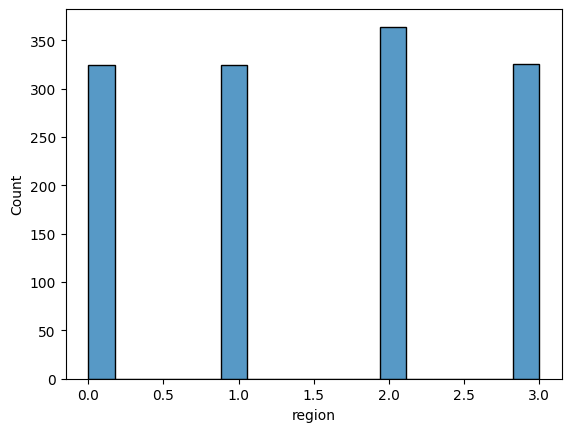

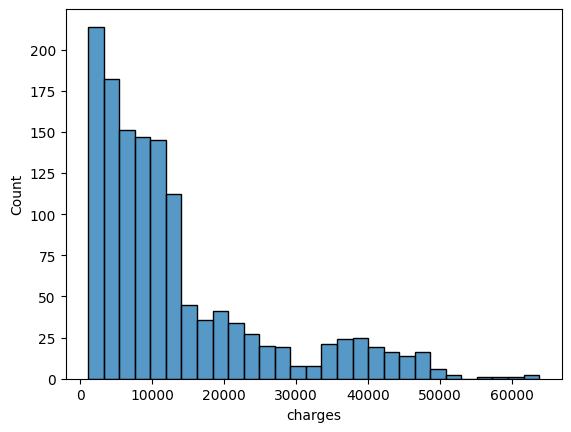

In [71]:
for col in data.columns:
    sns.histplot(x=data[col])
    plt.show()

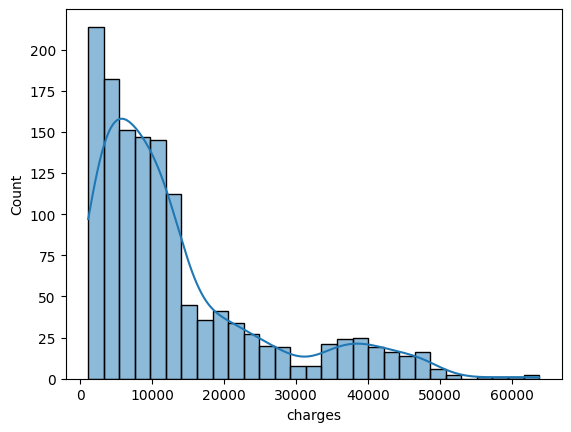

In [57]:
sns.histplot(data['charges'], kde=True)
plt.xlabel('charges')
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder

In [65]:
categorical_columns = ['sex', 'smoker', 'region']
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [66]:
x = data.drop('charges', axis = 1)
y = data['charges']

In [69]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [73]:
np.max(data , axis=0)

,0
age,64.00000
sex,1.00000
bmi,53.13000
children,5.00000
smoker,1.00000
region,3.00000
charges,63770.42801


In [74]:
np.min(data , axis=0)

,0
age,18.0000
sex,0.0000
bmi,15.9600
children,0.0000
smoker,0.0000
region,0.0000
charges,1121.8739


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [76]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [77]:
y_pred = model.predict(x_test)

In [80]:
print("Absloute error",mean_absolute_error(y_test,y_pred))
print("Squared error",mean_squared_error(y_test,y_pred))
print("root mean Squared error",np.sqrt(mean_squared_error(y_test,y_pred)))

Absloute error 4045.2470168886593
Squared error 35907174.73038727
root mean Squared error 5992.259568008321


In [83]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.7538824783522108
0.7347332251474054
